# 資料處理
- [政府資料開放平臺](https://data.gov.tw)

In [1]:
# ! pipenv install pandas
# ! pipenv install matplotlib
# ! pipenv install xlrd
# ! pipenv install pdfminer3k

## 結構化資料

### CSV

In [2]:
import pandas

csv = pandas.read_csv('108年新竹縣房屋稅查定統計表.csv', index_col='類別')
csv.head()

,應稅-戶件數,應稅-本稅,應稅-面積,應稅-現值,免稅-戶件數,免稅-面積,免稅-現值
類別,,,,,,,
合計,219132,2033823298,46426154,134225188900,58557,13290668,31634029500
住家-自住或公益出租用,183501,900858671,28138652,78742179000,40801,5988370,11833461400
住家-非自住用,13344,146099994,2586157,10756147000,11018,1288686,3088468400
非住家-營業用,11748,574151174,6990398,19694285800,413,153217,299710300
非住家-私人醫院、診所或自由職業事務所用,261,9441825,109391,349905100,20,130082,969174100


### Excel

In [3]:
xlsx = pandas.read_excel('108年新竹縣房屋稅查定統計表.xlsx', index_col='類別')
xlsx.head()

,應稅-戶件數,應稅-本稅,應稅-面積,應稅-現值,免稅-戶件數,免稅-面積,免稅-現值
類別,,,,,,,
合計,219132,2033823298,46426154,134225188900,58557,13290668,31634029500
住家-自住或公益出租用,183501,900858671,28138652,78742179000,40801,5988370,11833461400
住家-非自住用,13344,146099994,2586157,10756147000,11018,1288686,3088468400
非住家-營業用,11748,574151174,6990398,19694285800,413,153217,299710300
非住家-私人醫院、診所或自由職業事務所用,261,9441825,109391,349905100,20,130082,969174100


### 半結構化資料

### JSON

In [4]:
json = pandas.read_json('108年新竹縣房屋稅查定統計表.json')
json.set_index('類別', inplace=True)
json.head()

,應稅-戶件數,應稅-本稅,應稅-面積,應稅-現值,免稅-戶件數,免稅-面積,免稅-現值
類別,,,,,,,
合計,219132,2033823298,46426154,134225188900,58557,13290668,31634029500
住家-自住或公益出租用,183501,900858671,28138652,78742179000,40801,5988370,11833461400
住家-非自住用,13344,146099994,2586157,10756147000,11018,1288686,3088468400
非住家-營業用,11748,574151174,6990398,19694285800,413,153217,299710300
非住家-私人醫院、診所或自由職業事務所用,261,9441825,109391,349905100,20,130082,969174100


### XML

In [5]:
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET

tree = ET.ElementTree(file='108年新竹縣房屋稅查定統計表.xml')
tax_list = []
for element in tree.iter(tag='Table1'):
    tax = {
        '類別': element.find('類別').text,
        '應稅-戶件數': element.find('應稅-戶件數').text,
        '應稅-本稅': element.find('應稅-本稅').text,
        '應稅-面積': element.find('應稅-面積').text,
        '應稅-現值': element.find('應稅-現值').text,
        '免稅-戶件數': element.find('免稅-戶件數').text,
        '免稅-面積': element.find('免稅-面積').text,
        '免稅-現值': element.find('免稅-現值').text
    }
    tax_list.append(tax)

df = pandas.DataFrame(tax_list)
df.set_index('類別', inplace=True)
df.head()

,應稅-戶件數,應稅-本稅,應稅-面積,應稅-現值,免稅-戶件數,免稅-面積,免稅-現值
類別,,,,,,,
合計,219132,2033823298,46426154,134225188900,58557,13290668,31634029500
住家-自住或公益出租用,183501,900858671,28138652,78742179000,40801,5988370,11833461400
住家-非自住用,13344,146099994,2586157,10756147000,11018,1288686,3088468400
非住家-營業用,11748,574151174,6990398,19694285800,413,153217,299710300
非住家-私人醫院、診所或自由職業事務所用,261,9441825,109391,349905100,20,130082,969174100


## 非結構化資料

### PDF

In [6]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LTTextBoxHorizontal, LAParams
from pdfminer.pdfinterp import PDFTextExtractionNotAllowed

# 以二進制讀取模式開啟檔案
file = open('simple1.pdf', 'rb')
# 用檔案物件來建立一個 PDF 文件分析器
praser = PDFParser(file)
# 建立一個 PDF 文件
doc = PDFDocument()
# 連線 分析器 與 文件物件
praser.set_document(doc)
doc.set_parser(praser)
# 提供初始化密碼，預設為空字串
doc.initialize()

# 檢測文件是否提供 txt 轉換，不提供就忽略
if not doc.is_extractable:
    raise PDFTextExtractionNotAllowed
else:
    # 建立 PDF 資源管理器 來管理共享資源
    rsrcmgr = PDFResourceManager()
    # 建立一個 PDF 裝置物件
    laparams = LAParams()
    device = PDFPageAggregator(rsrcmgr, laparams=laparams)
    # 建立一個 PDF 直譯器物件
    interpreter = PDFPageInterpreter(rsrcmgr, device)

    result = ''
    # 迴圈遍歷列表，每次處理一頁的內容
    for page in doc.get_pages():
        interpreter.process_page(page)
        # 接受該頁面的 LTPage 物件
        layout = device.get_result()
        # 這裡layout是一個 LTPage 物件，裡面存放著 這個page解析出的各種物件
        # 一般包括 LTTextBox, LTFigure, LTImage, LTTextBoxHorizontal 等等，
        for x in layout:
            # 想要獲取文字就獲得物件的text屬性
            if isinstance(x, LTTextBoxHorizontal):
                result += x.get_text()
        print(result)

Hello 
World
Hello 
World
H e l l o 
W o r l d
H e l l o 
W o r l d



# 網路爬蟲
- [HTTP Status](https://zh.wikipedia.org/wiki/HTTP状态码)

In [7]:
# ! pipenv install requests
# ! pipenv install beautifulsoup4

### GET
- [臺灣證券交易所](http://www.twse.com.tw/zh/)

In [8]:
from datetime import datetime
import requests

now = datetime.now().strftime('%Y%m%d')
url = 'http://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={}&type=ALL&_=1559446410007'.format(now)
response = requests.get(url)
response

<Response [200]>

### POST
- [台灣高鐵](http://www.thsrc.com.tw/tw/TimeTable/Search)

In [9]:
url = 'http://www.thsrc.com.tw/tw/TimeTable/Search'

param = {
    'StartStationName': '台北站',
    'EndStationName': '左營站',
    'SearchType': 'S',
    'StartStation': '977abb69-413a-4ccf-a109-0272c24fd490',
    'EndStation': 'f2519629-5973-4d08-913b-479cce78a356',
    'DepartueSearchDate': '2019/06/30',
    'DepartueSearchTime': '06:00'
}

response = requests.post(url, data=param)
response

<Response [200]>

# 資料剖析
- [w3schools - 英文版](https://www.w3schools.com)
- [w3schools - 中文版](http://www.w3school.com.cn)

### [蘋果日報](https://tw.appledaily.com/new/realtime)

In [10]:
from bs4 import BeautifulSoup

url = 'https://tw.appledaily.com/new/realtime'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

for link in soup.select('li.rtddt a'):
    category = link.select_one('h2').text
    title = link.select_one('h1').text
    time = link.select_one('time').text
    url = link.get('href')
    print(category, title, time, url)

社會 消費糾紛​怒砸Apple專賣店　竟是四海... 02:00 https://tw.news.appledaily.com/local/realtime/20190813/1615836/
國際 港人蒙眼怒吼　黑警還眼 01:40 https://tw.news.appledaily.com/international/realtime/20190813/1615830/
國際 香港國泰員工堅持和平集會　央視主播譏：n... 01:39 https://tw.news.appledaily.com/international/realtime/20190813/1615833/
國際 瘋警射瞎少女　萬人癱瘓機場討公道 01:30 https://tw.news.appledaily.com/international/realtime/20190813/1615829/
國際 警察暴力無上限　港人募資登報控恐襲 01:26 https://tw.news.appledaily.com/international/realtime/20190813/1615831/
國際 美參院多數黨領袖：北京任何暴力鎮壓將「完... 01:11 https://tw.news.appledaily.com/international/realtime/20190813/1615828/
國際 港警闖入濫射　300街坊圍太古站要求港鐵... 00:56 https://tw.news.appledaily.com/international/realtime/20190813/1615826/
娛樂 周杰倫為昆凌慶生玩親親　老蕭被閃瞎「排醫... 00:56 https://tw.entertainment.appledaily.com/realtime/20190813/1615827/
社會 【私菸案】檢調首度直搗總統府侍衛室　1軍... 00:47 https://tw.news.appledaily.com/local/realtime/20190813/1615825/
生活 【台港停飛1】黑潮癱瘓香港機場！ 周一、... 00:33 https://tw.news.appledaily.com/life/realtime/20190813/1615823/
社會 ​北

### [自由時報](https://news.ltn.com.tw/list/breakingnews)

In [11]:
url = 'https://news.ltn.com.tw/list/breakingnews'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

for link in soup.select('ul.list.imm li a.tit'):
    title = link.select_one('p').text.strip()
    time = link.select_one('span').text
    url = link.get('href')
    print(title, time, 'https:' + url)

香港情勢堪憂 歐股收黑 02:12 https://news.ltn.com.tw/news/business/breakingnews/2882486
美籲香港警民衝突雙方 避免暴力 01:43 https://news.ltn.com.tw/news/world/breakingnews/2882484
現任總統預選慘敗 阿根廷股市盤中暴跌30% 01:20 https://news.ltn.com.tw/news/business/breakingnews/2882474
高市大寮雷擊逾2百戶停電 台電漏夜搶修 01:05 https://news.ltn.com.tw/news/society/breakingnews/2882472
港警無差別暴力引發機場靜坐  警方反問證據何在 00:45 https://news.ltn.com.tw/news/world/breakingnews/2882468
太陽花學運後 林飛帆與方仰寧有機會在彰化重逢‧‧‧ 00:43 https://news.ltn.com.tw/news/politics/breakingnews/2882464
反送中》「美軍到香港支援」 白宮連署請願火速過關 00:37 https://news.ltn.com.tw/news/world/breakingnews/2882460
爆吳敦義掌握韓國瑜「荒唐事」證據  黃光芹：是否開除黨籍？ 00:31 https://news.ltn.com.tw/news/politics/breakingnews/2882452
反送中》港人「警察還眼」行動 鎮暴警察現身機場內 00:30 https://news.ltn.com.tw/news/world/breakingnews/2882031
美參院共和黨領袖警告中國  勿暴力鎮壓香港抗議 00:27 https://news.ltn.com.tw/news/world/breakingnews/2882441
楊秋興批韓國瑜 臉書照例引來韓粉圍剿 00:25 https://news.ltn.com.tw/news/politics/breakingnews/2882458
香港機場停飛 歐媒:抗爭升級尚未看到盡頭 00:22 https://news.ltn.com.tw/news/wo

### [中國時報](https://www.chinatimes.com/realtimenews/?chdtv)

In [12]:
url = 'https://www.chinatimes.com/realtimenews/?chdtv'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

for link in soup.select('.articlebox-compact .row .col'):
    title = link.select_one('h3').text
    time = link.select_one('.meta-info time').get('datetime')
    category = link.select_one('.meta-info .category').text
    url = link.select_one('h3').select_one('a').get('href')
    print(category, title, time, 'https:' + url)

娛樂 周杰倫嘴對嘴啾昆凌甜爆！罕曬大尺度吻照閃瞎粉絲 2019-08-13 00:22 https:/realtimenews/20190813000027-260404
政治 楊秋興痛批韓國瑜 韓陣營：請律師蒐證 2019-08-13 00:19 https:/realtimenews/20190813000022-260407
生活 忠犬穿喪服參加主人葬禮 一個月後...結局讓萬人淚崩 2019-08-13 00:08 https:/realtimenews/20190813000019-260405
財經 競爭跨入5G 台積電、三星打3仗誰勝出？ 2019-08-13 00:04 https:/realtimenews/20190813000002-260410
社會 進去5分鐘就出來...他求救網友神回超爆笑 2019-08-13 00:03 https:/realtimenews/20190813000003-260402
財經 老美為何挑釁陸？專家揭川普商人談判法 2019-08-13 00:03 https:/realtimenews/20190813000004-260410
體育 NBA》歐尼爾自認湖人史上前三大中鋒 2019-08-13 00:02 https:/realtimenews/20190813000007-260403
財經 房價下跌不可怕？專家曝房市最大危機 2019-08-13 00:01 https:/realtimenews/20190813000005-260410
兩岸 美中情局介入香港示威？ 陸外交部：美國煽風點火 2019-08-12 23:58 https:/realtimenews/20190812004431-260409
生活 香港機場持續癱瘓 台港線航班週二最新異動 2019-08-12 23:49 https:/realtimenews/20190812004425-260405
社會 Apple專賣店消費糾紛  莽男球棒砸店遭逮 2019-08-12 23:46 https:/realtimenews/20190812004415-260402
國際 流星撞木星 業餘天文學家拍攝到 2019-08-12 23:35 https:/realtimenews/20190812004422-260408
國際 

### 抓取蘋果內文

In [13]:
from datetime import datetime
import requests
from bs4 import BeautifulSoup


def crawler(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


def page_detail(detail_url):
    soup = crawler(detail_url)

    news_detail = {
        'title': soup.select_one('h1').text,
        'summary': soup.select_one('.ndArticle_margin p').text,
        'date': datetime.strptime(soup.select_one('.ndArticle_creat').text, '出版時間：%Y/%m/%d %H:%M'),
        'category': soup.select_one('.ndgTag .current').text,
        'url': detail_url
    }

    return news_detail


news_list = []
page_url = 'https://tw.appledaily.com/new/realtime/{}'
for page in range(1, 4):
    soup = crawler(page_url.format(page))
    for link in soup.select('li.rtddt a'):
        detail_url = link.get('href')
        news_list.append(page_detail(detail_url))
    print('Page:', page)
print('total news:', len(news_list))

Page: 1
Page: 2
Page: 3
total news: 90


In [14]:
import pandas

df = pandas.DataFrame(news_list)
df.head()

,title,summary,date,category,url
0,消費糾紛​怒砸Apple專賣店 竟是四海幫前中常委,因Apple電腦消費糾紛，前黑道大哥竟怒砸店洩憤！四海幫前中常委林全定（62歲），日前購買7...,2019-08-13 02:00:00,社會,https://tw.news.appledaily.com/local/realtime/...
1,港人蒙眼怒吼 黑警還眼,香港警察暴力鎮壓、近距離開槍射傷示威少女右眼，引爆香港人怒火，約5、6000巿民響應網民號召...,2019-08-13 01:40:00,國際,https://tw.news.appledaily.com/international/r...
2,香港國泰員工堅持和平集會 央視主播譏：no zuo no die,香港示威活動持續，國泰航空及國泰港龍航空員工發表聲明指，對打壓員工參與和平示威表示極度遺憾。...,2019-08-13 01:39:00,國際,https://tw.news.appledaily.com/international/r...
3,瘋警射瞎少女 萬人癱瘓機場討公道,香港國際機場史無前例遭示威人潮擠爆、全面癱瘓！港警前夜瞄準示威者頭部發射催淚彈致一女右眼眼球...,2019-08-13 01:30:00,國際,https://tw.news.appledaily.com/international/r...
4,警察暴力無上限 港人募資登報控恐襲,「喪盡天良！」在眾目睽睽及媒體鏡頭下，從近距離行刑式開槍掃射、到以布袋彈打爆少女眼球，再到地...,2019-08-13 01:26:00,國際,https://tw.news.appledaily.com/international/r...


In [15]:
category = df['category'].value_counts()
category

國際      13
娛樂時尚    12
3C車市    12
社會      12
生活      11
論壇       9
吃喝玩樂     8
政治       7
財經地產     5
體育       1
Name: category, dtype: int64

Populating the interactive namespace from numpy and matplotlib


/Users/user/.local/share/virtualenvs/Python_-_DataAnalysis-JELpE5qp/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'time', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


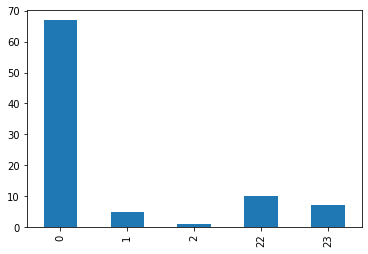

In [16]:
%pylab inline
hour = df['date'].dt.hour.value_counts().sort_index()
hour.plot(kind='bar')

In [17]:
df[df['summary'].str.contains('韓國瑜')]

,title,summary,date,category,url
43,「以後要怎麼教兒子」一句話決定開吉 韓國瑜：溫良恭儉、再也不讓,國民黨中評委陳宏昌前天公開力挺總統蔡英文連任，並稱「國民黨怎麼可以提名一個整天打麻將、整天吃...,2019-08-13 00:02:00,政治,https://tw.news.appledaily.com/politics/realti...
67,《蘋果》精彩獨家新聞 升級壹會員不漏接,編按：《蘋果新聞網》逾5百名記者編輯，日夜堅守新聞專業，發揮踢爆力量、為弱勢發聲，不斷推出各...,2019-08-13 00:00:00,體育,https://tw.sports.appledaily.com/realtime/2019...
74,楊秋興跨海狂掀韓國瑜黑底 「小三、酗酒、夜店是現在進行式」,(更新：新增韓國瑜競選總部回應)今遭開除黨籍的前國民黨中評委陳宏昌因力挺總統蔡英文連任，並批...,2019-08-12 23:49:00,政治,https://tw.news.appledaily.com/politics/realti...
78,表態願與郭台銘合作 王金平：誰選總統遲早要談,「郭柯王」結盟成形，3人最快本周將會見面，立法院前院長王金平今天首度正面表態，將與鴻海創辦人...,2019-08-12 23:08:00,政治,https://tw.news.appledaily.com/politics/realti...
84,反送中抗爭擴大 鄭文燦：國家暴力對港居民,桃園市長鄭文燦本月6日出訪日本，於今晚搭機返台，鄭文燦在機場受訪時表示，此行主要是因為千葉縣...,2019-08-12 22:46:00,政治,https://tw.news.appledaily.com/politics/realti...


In [18]:
df.set_index('title', inplace=True)
df.to_clipboard(sep=',')
cb = pandas.read_clipboard(sep=',')
cb.head()

,title,summary,date,category,url
0,消費糾紛​怒砸Apple專賣店 竟是四海幫前中常委,因Apple電腦消費糾紛，前黑道大哥竟怒砸店洩憤！四海幫前中常委林全定（62歲），日前購買7...,2019-08-13 02:00:00,社會,https://tw.news.appledaily.com/local/realtime/...
1,港人蒙眼怒吼 黑警還眼,香港警察暴力鎮壓、近距離開槍射傷示威少女右眼，引爆香港人怒火，約5、6000巿民響應網民號召...,2019-08-13 01:40:00,國際,https://tw.news.appledaily.com/international/r...
2,香港國泰員工堅持和平集會 央視主播譏：no zuo no die,香港示威活動持續，國泰航空及國泰港龍航空員工發表聲明指，對打壓員工參與和平示威表示極度遺憾。...,2019-08-13 01:39:00,國際,https://tw.news.appledaily.com/international/r...
3,瘋警射瞎少女 萬人癱瘓機場討公道,香港國際機場史無前例遭示威人潮擠爆、全面癱瘓！港警前夜瞄準示威者頭部發射催淚彈致一女右眼眼球...,2019-08-13 01:30:00,國際,https://tw.news.appledaily.com/international/r...
4,警察暴力無上限 港人募資登報控恐襲,「喪盡天良！」在眾目睽睽及媒體鏡頭下，從近距離行刑式開槍掃射、到以布袋彈打爆少女眼球，再到地...,2019-08-13 01:26:00,國際,https://tw.news.appledaily.com/international/r...


In [19]:
df.to_csv('appledaily.csv')

In [20]:
# ! pipenv install openpyxl
df.to_excel('appledaily.xlsx')

### [591 租屋網](https://rent.591.com.tw/?kind=0&region=1)

In [21]:
import requests
from bs4 import BeautifulSoup

response_session = requests.session()
response1 = response_session.get('https://rent.591.com.tw/?kind=1&region=1&section=5')
soup = BeautifulSoup(response1.text, 'html.parser')
token = soup.select_one('meta[name="csrf-token"]')['content']
token

'ramZLMUHNSs4wW00T9TWI1KeEjk2zckyAtCNWyTa'

In [22]:
headers = {
    'X-CSRF-TOKEN': token,
    'X-Requested-With': 'XMLHttpRequest'
}
response2 = response_session.get(
    'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=0&searchtype=1&region=1',
    headers=headers)
json = response2.json()
json.keys()

dict_keys(['status', 'data', 'records', 'is_recom', 'deal_recom', 'online_social_user'])

In [23]:
df = pandas.DataFrame(json['data']['data'])
print('total data:', len(df))
df.head()

total data: 30


,id,user_id,address,type,post_id,regionid,sectionid,streetid,room,area,...,icon_class,fulladdress,address_img_title,browsenum_name,unit,houseid,region_name,section_name,addInfo,onepxImg
0,7966031,2173857,天母西路101巷面磺溪陽光..,1,7966031,1,9,26024,99,36.0,...,rent,天母西路101巷面磺溪陽光宅，近榮總,面磺溪陽光宅，近榮總,昨日瀏覽,元/月,7966031,台北市,北投區,,
1,8000220,300726,中坡北路後山埤優質三房!..,1,8000220,1,11,26251,3,30.4,...,rent,中坡北路後山埤優質三房!到站即到家,後山埤優質三房!到站即到家,昨日瀏覽,元/月,8000220,台北市,南港區,,
2,8039237,482045,羅斯福路二段77巷古..,1,8039237,1,5,25679,0,10.0,...,rent,羅斯福路二段77巷古亭捷運2分鐘一樓套房,古亭捷運2分鐘一樓套房,昨日瀏覽,元/月,8039237,台北市,大安區,,
3,7974712,830190,仁愛路四段151巷忠..,1,7974712,1,5,67192,0,10.0,...,rent,仁愛路四段151巷忠孝捷運+全新裝潢+明曜名人巷+專人清潔,忠孝捷運+全新裝潢+明曜名人巷+專人清潔,昨日瀏覽,元/月,7974712,台北市,大安區,,
4,7991487,397250,新生北路二段119巷新生南..,1,7991487,1,3,25742,0,4.0,...,rent,新生北路二段119巷新生南京東路口只有對走道窗超低總價,新生南京東路口只有對走道窗超低總價,昨日瀏覽,元/月,7991487,台北市,中山區,,


In [24]:
import math

total_rows = 100
total_page = math.ceil(total_rows // 30)
datas = []
for page in range(total_page):
    response3 = response_session.get(
        'https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=0&searchtype=1&region=1&firstRow={}&totalRows={}'
            .format(page * 30, total_rows), headers=headers)
    json = response3.json()
    df = pandas.DataFrame(json['data']['data'])
    datas.append(df)
    print('Page:', page + 1)
df = pandas.concat(datas)
print('total data:', len(df))
df.head()

Page: 1
Page: 2
Page: 3
total data: 90


,id,user_id,address,type,post_id,regionid,sectionid,streetid,room,area,...,icon_class,fulladdress,address_img_title,browsenum_name,unit,houseid,region_name,section_name,addInfo,onepxImg
0,7966031,2173857,天母西路101巷面磺溪陽光..,1,7966031,1,9,26024,99,36.0,...,rent,天母西路101巷面磺溪陽光宅，近榮總,面磺溪陽光宅，近榮總,昨日瀏覽,元/月,7966031,台北市,北投區,,
1,8000220,300726,中坡北路後山埤優質三房!..,1,8000220,1,11,26251,3,30.4,...,rent,中坡北路後山埤優質三房!到站即到家,後山埤優質三房!到站即到家,昨日瀏覽,元/月,8000220,台北市,南港區,,
2,8039237,482045,羅斯福路二段77巷古..,1,8039237,1,5,25679,0,10.0,...,rent,羅斯福路二段77巷古亭捷運2分鐘一樓套房,古亭捷運2分鐘一樓套房,昨日瀏覽,元/月,8039237,台北市,大安區,,
3,7974712,830190,仁愛路四段151巷忠..,1,7974712,1,5,67192,0,10.0,...,rent,仁愛路四段151巷忠孝捷運+全新裝潢+明曜名人巷+專人清潔,忠孝捷運+全新裝潢+明曜名人巷+專人清潔,昨日瀏覽,元/月,7974712,台北市,大安區,,
4,7991487,397250,新生北路二段119巷新生南..,1,7991487,1,3,25742,0,4.0,...,rent,新生北路二段119巷新生南京東路口只有對走道窗超低總價,新生南京東路口只有對走道窗超低總價,昨日瀏覽,元/月,7991487,台北市,中山區,,


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 29
Data columns (total 88 columns):
id                        90 non-null int64
user_id                   90 non-null int64
address                   90 non-null object
type                      90 non-null object
post_id                   90 non-null int64
regionid                  90 non-null int64
sectionid                 90 non-null int64
streetid                  90 non-null int64
room                      90 non-null int64
area                      90 non-null float64
price                     90 non-null object
storeprice                90 non-null int64
comment_total             90 non-null int64
comment_unread            90 non-null int64
comment_ltime             90 non-null int64
hasimg                    90 non-null int64
kind                      90 non-null int64
shape                     90 non-null int64
houseage                  90 non-null int64
posttime                  90 non-null object
updatetime 

In [26]:
df = df[['post_id', 'area', 'layout', 'address', 'floor', 'allfloor', 'browsenum_all', 'price']]
df['price'] = df['price'].map(lambda x: int(x.replace(',', '')))
df.sort_values('price', ascending=False).head()

,post_id,area,layout,address,floor,allfloor,browsenum_all,price
22,7975559,32.0,2房1廳1衛,忠孝東路四段信義區..,9,14,2130,190000
21,7964466,110.5,4房2廳3衛,寧波西街南海苑鋼骨豪邸,3,14,1641,160000
29,7975663,28.0,1房1廳1衛,忠孝東路四段紅典酒店式公..,6,14,1844,136000
27,8038332,54.0,4房2廳2衛,樂群三路美麗華商圈/近捷..,9,9,642,100000
4,8040413,54.3,3房2廳2衛,忠誠路一段天母海涵忠誠公..,6,14,665,98000


In [27]:
df['price'].describe()

count        90.000000
mean      28885.355556
std       32731.649342
min        3500.000000
25%        9925.000000
50%       16250.000000
75%       34250.000000
max      190000.000000
Name: price, dtype: float64

In [28]:
(df['price'] / df['area']).describe()

count      90.000000
mean     1659.772852
std       786.727666
min       437.956204
25%      1200.000000
50%      1641.666667
75%      1887.668919
max      5937.500000
dtype: float64

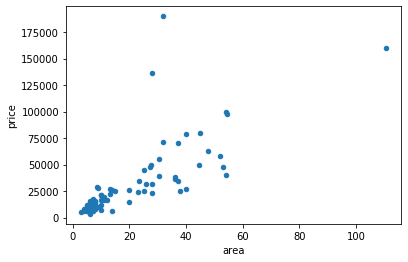

In [29]:
df.plot(x='area', y='price', kind='scatter')

# 各式爬蟲技巧

### 塞Cookies

### [批踢踢實業坊](https://www.ptt.cc/bbs/index.html)

In [30]:
cookies = {'over18': '1'}
response = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies=cookies)
# response.text

### 仿冒真人用戶

### [卡提諾論壇](https://ck101.com/)

In [31]:
# 在 headers 加入 user-agent
headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36'
}
response = requests.get('https://ck101.com/', headers=headers)
response

<Response [200]>

### [財報狗](https://statementdog.com/)

In [32]:
headers = {
    'cookie': 'upgrade_browser=1; intercom-id-d5wdetwg=db88684d-bb9a-4d04-9087-05138b2ad92a; buuid=dFdZTVliblRVempGMU4xVFdTaVZIQ0hIOWY4a1pYQTFRdWU0K2hjUTI1WWhwajBKOHZFSEFOUU1lZnZtVlZ4Zi0tSmkxdFBjSTFJRTdoQWZ5TkxxbXFadz09--10774a12b761634ade41d0ddda7d82957989daa3; easy_ab=45dd7721-fc22-44c4-943a-5e0d3e6d92e6; remember_user_token=W1szNzkxNzFdLCIkMmEkMTAkMWt5bTNldERTcmFLaU1KZXNwSmdOLiIsIjE1NjU2MzIzNDUuMjcxODE3NCJd--d03c927beb067fb49c3fddb5325e858c3c861e9e; intercom-session-d5wdetwg=ZENkNlJYVC95czRLMktHT1NpTW1ldGh0ck9Wc2ZOOWU3a09pVjJVSGpQbVFMUWg3YVAyRzh2ODBBVW9lVk5heC0tZEkrdU1aTTJkbStIZjRVYnAycU1OZz09--bc718982aa8816f7a3a012baa227454825dd8da6; _statementdog_session_v2=QUhqWHIwa2tPS29KNXJkb2ZORVdpSGhoUHk5SFRLby9GWTNJelRMWFEvM2VoSEltYzd6V3U3NThZN28rcUNJWHcxMzZCNmY4dk4wcThvYkxhY2dSVk9OazY1aGZib1lzNEs3QkE4Y0M1QnF2VW9OZXdrMEN5Mk5aN3Vob3M2Zlc2NENSaXllaHMwcldRRXBXcG1XbGxNbmNPOWpPNkNZdlpzUFZiRklwRHovaFJNTEI1bTI0TFRmVzBwaWZjL2lMR0JLeXQvRnJubkE2bHIyN2ZPdHM1Z1JIbUhuYVZ3Q0RwUzRteW83d3E2TmIzaGpSQ3B3cG5qZWdYbUw2ZHY2dTc3YnhxbndtdXNEOWpnYTZQT0E4ZzVEK2hRc1JSZGdQckF1SkgzTUh1WVJCT0YzSXg5R2c3d2UxLy8vb0lobHpoa1d3L2gzZDlENGsyb3diaFdXMWR3PT0tLXFMM3NHQ2RTcVBRNUJsQzFteDZJV3c9PQ%3D%3D--67af0931fb690d441db95b9b64f4d0abd0e82715'
}
response = requests.get('https://statementdog.com/api/v1/feeds?&_=1565632565633', headers=headers)
# response.json()

### 抓取文字以外的東西
- 圖片.音樂.PDF

### [維基百科](https://zh.wikipedia.org/wiki/Wikipedia:首页)

In [33]:
response = requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Guido_van_Rossum_OSCON_2006.jpg/1280px-Guido_van_Rossum_OSCON_2006.jpg')
with open('Guido_van_Rossum.jpg' , 'wb') as file:
    file.write(response.content)

### [Pinterest](https://www.pinterest.com/)

In [34]:
import json

response = requests.get('https://www.pinterest.jp/shojis1000/%E3%81%82%E3%81%BE%E3%81%A4%E6%A7%98/')
soup = BeautifulSoup(response.text, 'html.parser')
image_info = soup.select_one('#initial-state').text
json_dict = json.loads(image_info)
json_dict

{'ui': {'mainComponent': {'current': 'UnauthBoardPage',
   'initial': 'UnauthBoardPage',
   'locationToErrorMap': {},
   'upwtActionName': 102}},
 'location': {'pathname': '/shojis1000/あまつ様/',
  'history': [{'pathname': '/shojis1000/あまつ様/'}]},
 'resources': {'fetching': {},
  'data': {'ReactBoardFeedResource': {'board_id="65513438268681445",board_title="あまつ様",board_topic=null,owner_indexed=true,pin_count=192,section_count=0': {'data': {'bookmarks': 'LT42NTUxMzM2OTU2NTI5Njk1OHwyNXwyNXw2MjY1OGQ0NDkxODM3OGYwY2M2NDg0YWMwM2ZhMjM3ZjFmMDQ3OWJkZmZhMDU0NWYyMzMxZDVmNGVlNTNiODA1fE5FV3w=',
      'board_feed': [{'domain': 'Uploaded by user',
        'tracking_params': 'CwABAAAAEDg5NDMzNTcwOTkyNDMzMzQA',
        'aggregated_pin_data': {'aggregated_stats': {'saves': 88, 'done': 0}},
        'story_pin_data_id': None,
        'images': {'170x': {'url': 'https://i.pinimg.com/170x/93/6a/49/936a497fca0c6c1e5e73bd7202a8df40.jpg',
          'width': 170,
          'height': 301},
         '474x': {'url': '

In [35]:
images = json_dict['resources']['data']['BoardPageResource'] \
    ['field_set_key="detailed",get_page_metadata=true,main_module_name="UnauthBoardReactPage",pure_react=true,python_resource_prefetch=true,slug="あまつ様",username="shojis1000"'] \
    ['data']['images']

In [36]:
for image in images['474x']:
    url = image['url']
    file_name = url.split('/')[-1]
    image_data = requests.get(url)

    with open(file_name, 'wb') as file:
        file.write(image_data.content)